In [1]:
#PART II - LOGISTIC REGRESSION
# TARGET CHOSEN : PRICE

In [2]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle



In [4]:
df = pd.read_csv('diamond_cleaned.csv')

In [5]:
print(df)
df=df.dropna()
X_data = df.drop('price',axis = 'columns')
Y_data = df.price
print(Y_data)
print(np.shape(Y_data))
#converting y data to binary
Y_data = Y_data.apply(lambda x: 0 if x < 0.37 else 1)
print(X_data)
print(np.shape(Y_data))

train_count = int(0.8*(len(X_data)))

X_train = X_data[:train_count]
X_test = X_data[train_count:]
Y_train = Y_data[:train_count]
Y_test = Y_data[train_count:]

print(np.shape(X_train),np.shape(X_test),np.shape(Y_train),np.shape(Y_test))

          carat     price         x         y         z
0      0.016667  0.000000  0.039783  0.053763  0.238318
1      0.005556  0.000000  0.028933  0.028674  0.210280
2      0.016667  0.000086  0.057866  0.069892  0.210280
3      0.050000  0.000692  0.084991  0.098566  0.285047
4      0.061111  0.000778  0.110307  0.120072  0.313084
...         ...       ...       ...       ...       ...
53935  0.288889  0.210258  0.365280  0.372760  0.488318
53936  0.288889  0.210258  0.354430  0.370968  0.514019
53937  0.277778  0.210258  0.349005  0.358423  0.502336
53938  0.366667  0.210258  0.437613  0.437276  0.544393
53939  0.305556  0.210258  0.379747  0.392473  0.521028

[53940 rows x 5 columns]
0        0.000000
1        0.000000
2        0.000086
3        0.000692
4        0.000778
           ...   
53935    0.210258
53936    0.210258
53937    0.210258
53938    0.210258
53939    0.210258
Name: price, Length: 49000, dtype: float64
(49000,)
          carat         x         y         z
0     

In [189]:
class LogisticRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate= learning_rate
        self.iterations = iterations
        self.weights=[]
        self.yPred=0
    def sigmoid(self,val):
        sigmoid_fun = (1/(1+np.exp(-val)))
        return sigmoid_fun
    def cost(self,X,y):
        yPred = self.sigmoid(np.dot(X,self.weights))
        #print('ypredict : ',yPred)
        loss = -1 * np.mean( y*np.log10(yPred) + (1-y)*np.log10(1-yPred))  #how mean? and rewrite acc to mam
        #print('loss : ',loss)
        return loss
    def gradient_descent(self, w, X, y, lr):
        n = X.shape[0]
        gradient = (1/n) * np.dot(X.T, (self.yPred - y))
        self.weights -= (lr * gradient.T)
    def predict(self,w,X):
        yPred = self.sigmoid(np.dot(X,w))
        #print(yPred)
        ans_arr = []
        print(yPred)
        for y in yPred:
            if (y>=0.5):
                ans_arr.append(1)
            else:
                ans_arr.append(0)
        return ans_arr
    def initialize_weights(self, num_features): #DO NOT MODIFY THIS FUNCTION
        w = np.random.uniform(0,1,(num_features))
        return w
    def fit(self,X, y, learning_rate=0.001, iterations=100000):
        ones = np.ones((X.shape[0],1),dtype=int)
        self.weights = self.initialize_weights(X.shape[1])
        tr_loss_arr=[]
        for i in range(iterations):
            self.yPred = self.sigmoid(np.dot(X,self.weights))
            self.gradient_descent(self.weights,X,y,learning_rate)
            loss_val = self.cost(X,y) #RETURN OUTSIDE LOOP
            #print(loss_val)
            tr_loss_arr.append(loss_val)
        return tr_loss_arr
    def find_accuracy(self,Y_ground,Y_pred):
        n=len(Y_pred)
        y_pred_arr = []
        y_grnd_arr = []
        correct_val = 0
        print(n)
        for i in Y_pred:
            y_pred_arr.append(i)
        for i in Y_ground:
            y_grnd_arr.append(i)
        for i in range (len(y_pred_arr)):
            if(y_grnd_arr[i]==y_pred_arr[i]):
                correct_val+=1;
        print('Correct predictions : ', correct_val)
        print('Incorrect predictions : ',n-correct_val)
        return correct_val/n*100


if __name__ == '__main__':
    log_reg = LogisticRegression(0.01,100)
    
    Y_train_loss1 = log_reg.fit(X_train,Y_train,0.5,1000)
    Y_pred = log_reg.predict(log_reg.weights,X_test)
    accuracy = log_reg.find_accuracy(Y_test,Y_pred)
    print('weight',log_reg.weights)
    print('Accuracy with lr = 0.5 and 1000 iterations : ',accuracy)
    
    Y_train_loss2 = log_reg.fit(X_train,Y_train,0.01,1000)
    Y_pred = log_reg.predict(log_reg.weights,X_test)
    accuracy = log_reg.find_accuracy(Y_test,Y_pred)
    print('weight',log_reg.weights)
    print('Accuracy with lr = 0.01 and 1000 iterations : ',accuracy)

    Y_train_loss3 = log_reg.fit(X_train,Y_train,0.001,10000)
    Y_pred = log_reg.predict(log_reg.weights,X_test)
    accuracy = log_reg.find_accuracy(Y_test,Y_pred)
    print('weight',log_reg.weights)
    print('Accuracy with lr = 0.001 and 10000 iterations : ',accuracy)
    
#plot, weight print, pickle


    
    

[0.24036505 0.28982608 0.2416613  ... 0.26430516 0.36878378 0.28910811]
9772
Correct predictions :  9755
Incorrect predictions :  17
weight [ 6.4588244   1.7983444   0.84481874 -7.46165911]
Accuracy with lr = 0.5 and 1000 iterations :  99.82603356528857
[0.46636829 0.47550471 0.46699885 ... 0.46966612 0.48230209 0.47268791]
9772
Correct predictions :  9767
Incorrect predictions :  5
weight [ 0.61508263  0.37130888 -0.03248976 -0.81675287]
Accuracy with lr = 0.01 and 1000 iterations :  99.94883340155546
[0.46703165 0.4757293  0.46841137 ... 0.46766697 0.47086785 0.46742647]
9772
Correct predictions :  9771
Incorrect predictions :  1
weight [ 0.29283497  0.42432453 -0.42428902 -0.41182068]
Accuracy with lr = 0.001 and 10000 iterations :  99.98976668031109


In [190]:
import pickle
pickle_filename = 'logreg_diamonds.p'
model_info = {
    'learning rate' : 0.001,
    'iterations' : 100000,
    'model_weights': log_reg.weights,  
    'accuracy': accuracy  
}
with open(pickle_filename, 'wb') as file:
    pickle.dump(model_info,file)

In [191]:
pd.read_pickle(pickle_filename)

{'learning rate': 0.001,
 'iterations': 100000,
 'model_weights': array([ 0.29283497,  0.42432453, -0.42428902, -0.41182068]),
 'accuracy': 99.98976668031109}

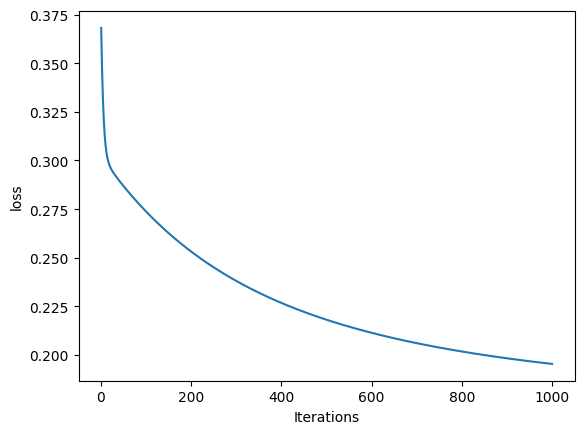

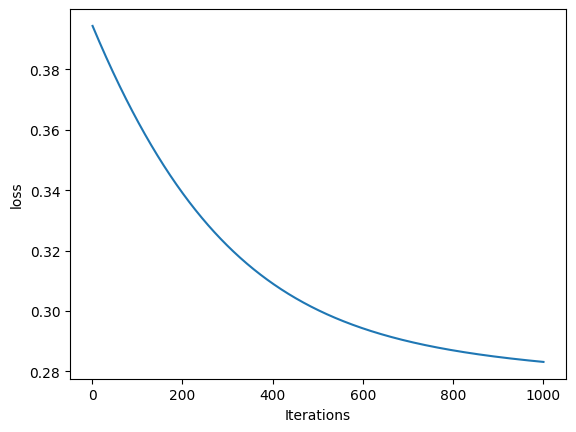

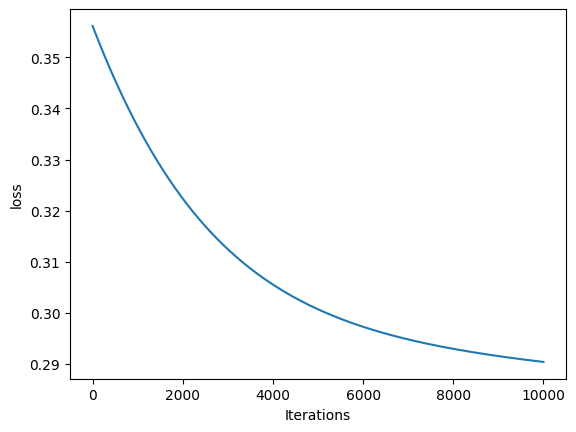

In [192]:

import numpy as np
plt.plot(np.arange(1,1001),Y_train_loss1)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()

plt.plot(np.arange(1,1001),Y_train_loss2)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()

plt.plot(np.arange(1,10001),Y_train_loss3)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()

In [ ]:
'''

=================================================PART 1==================================================

             index         carat  average_us_salary  diamonds_mined  \
count  52178.000000  51073.000000       53940.000000    53940.000000   
mean   26979.725804      0.797823       39521.990100        2.902669   
std    15566.154681      0.473747        5486.892971        1.325985   
min        1.000000      0.200000       30000.000000        0.600000   
25%    13498.250000      0.400000       34780.000000        1.750000   
50%    26989.500000      0.700000       39547.500000        2.910000   
75%    40458.750000      1.040000       44252.000000        4.050000   
max    53940.000000      5.010000       48999.000000        5.200000   

              depth         table         price             x             y  \
count  51866.000000  51030.000000  51844.000000  51027.000000  52208.000000   
mean      61.750175     57.456332   3933.022047      5.731451      5.734517   
std        1.433485      2.231611   3989.013631      1.121433      1.142543   
min       43.000000     43.000000    326.000000      0.000000      0.000000   
25%       61.000000     56.000000    951.000000      4.710000      4.720000   
50%       61.800000     57.000000   2401.000000      5.700000      5.710000   
75%       62.500000     59.000000   5327.250000      6.540000      6.540000   
max       79.000000     95.000000  18823.000000     10.740000     58.900000   

                  z  
count  51532.000000  
mean       3.538203  
std        0.706057  
min        0.000000  
25%        2.910000  
50%        3.530000  
75%        4.030000  
max       31.800000  
  


For preprocessing we used 
mode imputaion for categorical data value_counts() and get the index0, 
mean imputation for numerical data
find_quartile for finding the interquartile range
corr() to find the correlation matrix
Categorical().codes for converting to categorical values


#In visualization graphs we could have a prcise understanding on numeric data
Most of the diamonds have X between 4.5 to 6.5 
Most of the diamonds have Y between 4.5 to 6.5 
Most of the diamonds have Z between 3 to 4 
Most of the diamonds have price between 1000 to 4700 
Most of the diamonds have diamonds mined between 1.4 to 4 
Most of the diamonds have depth between 61 to 62.5 
Most of the diamonds have average_us_salary between 3500 to 4500  

For categorical data
Adelie species has the highest calorie requirement
There are more male penguins than female
Most of the penguins live in Torgersion island


=================================================PART 2==================================================


Best accuracy : 99.989%

From the losss graph it is analysed that when the iterations increases the loss decreases

Iteration1:
Correct predictions :  9755
Incorrect predictions :  17
weight [ 6.4588244   1.7983444   0.84481874 -7.46165911]
Accuracy with lr = 0.5 and 1000 iterations :  99.82603356528857

Iteration2:
Correct predictions :  9767
Incorrect predictions :  5
weight [ 0.61508263  0.37130888 -0.03248976 -0.81675287]
Accuracy with lr = 0.01 and 1000 iterations :  99.94883340155546

Iteration3:
Correct predictions :  9771
Incorrect predictions :  1
weight [ 0.29283497  0.42432453 -0.42428902 -0.41182068]
Accuracy with lr = 0.001 and 10000 iterations :  99.98976668031109

ADVANTAGES:
Logistic regression is easy to implement
It provides good accuracy and faster classification
It can determine the weight co-efficients efficiently
DISADVANTAGES:
If features is greater than the number of data samples it doesnt fit
It can only solve linearly seperable data
Sensitive to outliers
'''